In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wandb

def plot_accuracy_vs_parameters(df, parameters, accuracy_col='accuracy'):
    """
    Plots accuracy as a function of a set of parameters.
    
    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        parameters (list): A list of column names to plot against accuracy.
        accuracy_col (str): The name of the accuracy column. Default is 'accuracy'.
    """
    for param in parameters:
        plt.figure(figsize=(5, 3))
        sns.lineplot(data=df, x=param, y=accuracy_col, marker='o', ci=None)
        plt.title(f'Accuracy vs {param}')
        plt.xlabel(param)
        plt.ylabel('Accuracy')
        plt.show()

import itertools

def plot_2way_combinations(df, parameters, accuracy_col='accuracy'):
    """
    Plots 2-way combinations of parameters with accuracy as color.
    
    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        parameters (list): A list of column names to plot.
        accuracy_col (str): The name of the accuracy column. Default is 'accuracy'.
    """
    combinations = list(itertools.combinations(parameters, 2))
    
    for (param1, param2) in combinations:
        plt.figure(figsize=(5, 3))
        scatter = plt.scatter(data=df, x=param1, y=param2, c=accuracy_col, cmap='viridis')
        plt.colorbar(scatter, label='Accuracy')
        plt.title(f'{param1} vs {param2} with Accuracy as Color')
        plt.xlabel(param1)
        plt.ylabel(param2)
        plt.show()

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

api = wandb.Api()

# Project is specified by <entity/project-name>
runs = api.runs("zadorlab/spatial-transformer-sweep")

summary_list, config_list, name_list = [], [], []
for run in runs: 
    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    run_info = run.summary._json_dict.copy()

    run_info['state'] = run.state  # 'finished', 'running', 'crashed', etc.
    summary_list.append(run_info)


    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append(
        {k: v for k,v in run.config.items()
          if not k.startswith('_')})

    # .name is the human-readable name of the run.
    name_list.append(run.name)

summary_df = pd.json_normalize(summary_list)

# Flatten the 'config' column
config_df = pd.json_normalize(config_list)

summary_df['accuracy'] = 100 * summary_df['eval/accuracy']

# Concatenate the flattened DataFrames along with the 'name' column
runs_df = pd.concat([summary_df, config_df], axis=1)
runs_df.head(15)

,_runtime,_step,_timestamp,_wandb.runtime,eval/accuracy,eval/loss,eval/runtime,eval/samples_per_second,eval/steps_per_second,pool_weight,...,hidden_size,initializer_range,intermediate_size,max_position_embeddings,num_attention_heads_bert,num_hidden_layers,position_embedding_type,type_vocab_size,use_cache,vocab_size
0,5744.323387,1043.0,1.730492e+09,5745.0,0.704274,0.823354,7.2254,15545.084,3.875,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5814.553576,1043.0,1.730492e+09,5815.0,0.704558,0.833165,7.2332,15528.492,3.871,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5812.139808,1043.0,1.730492e+09,5813.0,0.704558,0.833165,7.3975,15183.522,3.785,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5779.942081,1043.0,1.730492e+09,5781.0,0.704558,0.833165,7.1966,15607.302,3.891,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5932.919495,1043.0,1.730493e+09,5934.0,0.704558,0.833165,7.2208,15555.130,3.878,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6063.282360,1043.0,1.730493e+09,6064.0,0.704558,0.833165,7.4862,15003.637,3.740,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3927.434072,695.0,1.730493e+09,3929.0,0.609402,1.136105,7.6675,14648.845,3.652,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,3962.117233,695.0,1.730493e+09,3963.0,0.609402,1.136105,7.8596,14290.837,3.563,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,3809.542805,695.0,1.730492e+09,3810.0,0.609402,1.136105,6.8735,16341.042,4.074,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,3849.253328,695.0,1.730492e+09,3850.0,0.667236,0.929194,6.7397,16665.541,4.155,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


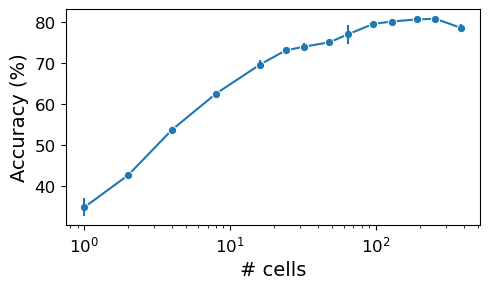

In [3]:

accuracy_col = 'accuracy'


tags = [["group_size"]]
filter_ = runs_df['wandb.tags'].isin(tags) & \
    ((runs_df['single_cell_augmentation'] == False) | (runs_df['data.group_size'] == 1))

plt.figure(figsize=(5, 3))
sns.lineplot(runs_df[filter_], x='data.group_size', y=accuracy_col, marker='o', errorbar="sd", err_style="bars")

# filter_ = runs_df['wandb.tags'].isin(tags) & (runs_df['model.detach_single_cell_logits'] == True)
# plt.scatter(runs_df[filter_]['data.group_size'], 100*runs_df[filter_][accuracy_col])

# plt.legend(['Multicell transformer', 'Pooled single-cell logits'])
# plt.xlim([.9, 200])
plt.xscale('log')
plt.xlabel("# cells")
plt.ylabel("Accuracy (%)")
plt.tight_layout()
# plt.savefig("../figures/group_size.png")

Text(0, 0.5, 'Accuracy (%)')

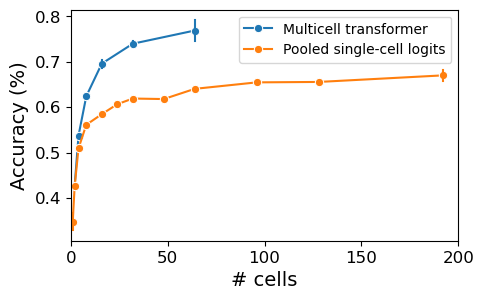

In [4]:
accuracy_col = 'eval/accuracy'

tags = [["group_size"]]
filter_ = runs_df['wandb.tags'].isin(tags) & (runs_df['single_cell_augmentation'] == False) & (runs_df['state'] == 'finished')

plt.figure(figsize=(5, 3))
sns.lineplot(runs_df[filter_], x='data.group_size', y=accuracy_col, marker='o', errorbar="sd", err_style="bars")

filter_ = runs_df['wandb.tags'].isin(tags) & (runs_df['model.detach_single_cell_logits'] == True) & (runs_df['single_cell_augmentation'] == True) #& (runs_df['state'] == 'finished')
sns.lineplot(runs_df[filter_], x='data.group_size', y=accuracy_col, marker='o', errorbar="sd", err_style="bars")

plt.legend(['Multicell transformer', 'Pooled single-cell logits'])
plt.xlim([0, 200])

plt.xlabel("# cells")
plt.ylabel("Accuracy (%)")

Just a plot of pooled single-cell accuracy

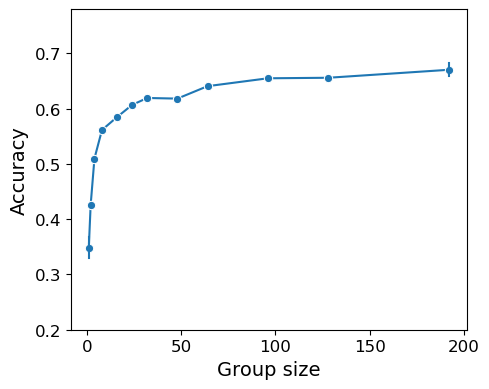

In [5]:


accuracy_col = 'eval/accuracy'

tags = [["group_size"]]
filter_ = runs_df['wandb.tags'].isin(tags) & (runs_df['train/epoch'] > 40) & (runs_df['model.detach_single_cell_logits'] == True) & (runs_df['single_cell_augmentation'] == True)

plt.figure(figsize=(5, 4))
sns.lineplot(runs_df[filter_], x='data.group_size', y=accuracy_col, marker='o', errorbar="sd", err_style="bars")


# plt.legend(['Multicell transformer', 'Pooled single-cell logits'])
# plt.xlim([.9, 200])
# plt.xscale('log')
plt.ylim([.2,.78])
plt.xlabel("Group size")
plt.ylabel("Accuracy")
plt.tight_layout()
# plt.savefig("../figures/group_size_single_cell_pooling.png")

### Train all cells towards their resepctive labels

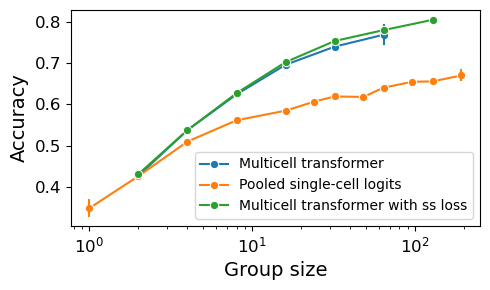

In [6]:


accuracy_col = 'eval/accuracy'

tags = [["group_size"]]
filter_ = runs_df['wandb.tags'].isin(tags) & (runs_df['single_cell_augmentation'] == False) & (runs_df['state'] == 'finished')

plt.figure(figsize=(5, 3))
sns.lineplot(runs_df[filter_], x='data.group_size', y=accuracy_col, marker='o', errorbar="sd", err_style="bars")

filter_ = runs_df['wandb.tags'].isin(tags) & (runs_df['model.detach_single_cell_logits'] == True) & (runs_df['single_cell_augmentation'] == True)
sns.lineplot(runs_df[filter_], x='data.group_size', y=accuracy_col, marker='o', errorbar="sd", err_style="bars")

tags = [["group_size_ss_loss"]]
filter_ = runs_df['wandb.tags'].isin(tags) & (runs_df['train/epoch'] > 40)
sns.lineplot(runs_df[filter_], x='data.group_size', y=accuracy_col, marker='o', errorbar="sd", err_style="bars")

plt.legend(['Multicell transformer', 'Pooled single-cell logits', 'Multicell transformer with ss loss'])
plt.xscale('log')
plt.xlabel("Group size")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.savefig("group_predictions_with_ss_loss.png", dpi=300)

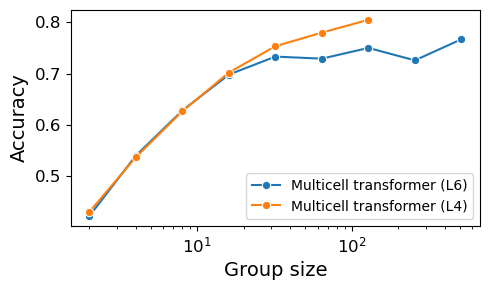

In [3]:


accuracy_col = 'eval/accuracy'

tags = [["group_size_ss_loss_L6"]]
filter_ = runs_df['wandb.tags'].isin(tags) &  (runs_df['state'] == 'finished')

plt.figure(figsize=(5, 3))
sns.lineplot(runs_df[filter_], x='data.group_size', y=accuracy_col, marker='o', errorbar="sd", err_style="bars")

tags = [["group_size_ss_loss"]]
filter_ = runs_df['wandb.tags'].isin(tags) & (runs_df['train/epoch'] > 40)
sns.lineplot(runs_df[filter_], x='data.group_size', y=accuracy_col, marker='o', errorbar="sd", err_style="bars")

plt.legend(['Multicell transformer (L6)', 'Multicell transformer (L4)'])
plt.xscale('log')
plt.xlabel("Group size")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.savefig("set_depth_acc.png", dpi=300)

Seems not to help much, but maybe a little bit.

Next let's plot the single-cell prediction accuracy for the model trained also on single-cell labels.

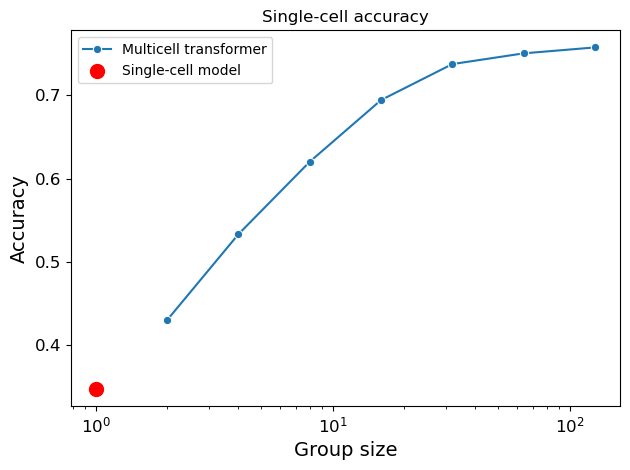

In [7]:

tags = [["group_size_ss_loss"]]
filter_ = runs_df['wandb.tags'].isin(tags) & (runs_df['train/epoch'] > 40)
sns.lineplot(runs_df[filter_], x='data.group_size', y='eval/cell_accuracy', marker='o', errorbar="sd", err_style="bars")


tags = [["group_size"]]
filter_ = runs_df['wandb.tags'].isin(tags) & (runs_df['data.group_size'] == 1)  & (runs_df['train/epoch'] > 40)
# get average accuracy
single_cell_accuracy = runs_df[filter_]['eval/accuracy'].mean()
# plot as single point at y=single_cell_accuracy, x=1
plt.scatter(1, single_cell_accuracy, color='red', s=100)

plt.legend(['Multicell transformer', 'Single-cell model', ])
plt.xscale('log')
plt.xlabel("Group size")
plt.ylabel("Accuracy")
plt.title("Single-cell accuracy")
plt.tight_layout()
plt.savefig("ss_predictions_with_group_size.png", dpi=300)


### Using relative locations of the cells from the centroid

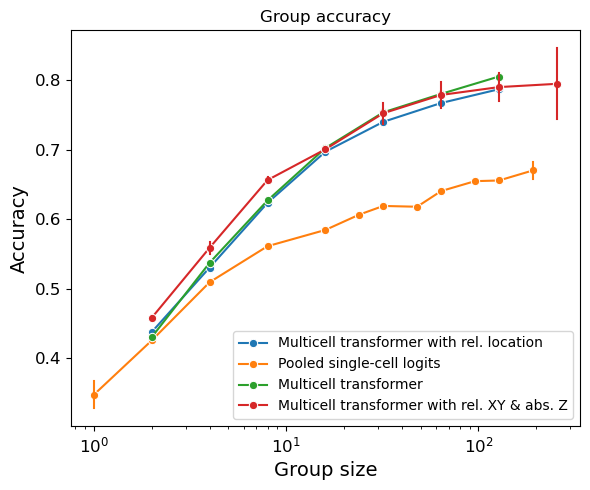

In [10]:


accuracy_col = 'eval/accuracy'

tags = [["group_size_rel_pos"]]
filter_ = runs_df['wandb.tags'].isin(tags) #& (runs_df['train/epoch'] > 40)

plt.figure(figsize=(6, 5))
sns.lineplot(runs_df[filter_], x='data.group_size', y=accuracy_col, marker='o', errorbar="sd", err_style="bars")

tags = [["group_size"]]
filter_ = runs_df['wandb.tags'].isin(tags) & (runs_df['model.detach_single_cell_logits'] == True) & (runs_df['single_cell_augmentation'] == True)
sns.lineplot(runs_df[filter_], x='data.group_size', y=accuracy_col, marker='o', errorbar="sd", err_style="bars")

tags = [["group_size_ss_loss"]]
filter_ = runs_df['wandb.tags'].isin(tags) & (runs_df['train/epoch'] > 40)
sns.lineplot(runs_df[filter_], x='data.group_size', y=accuracy_col, marker='o', errorbar="sd", err_style="bars")


tags = [["group_size_rel_pos_absZ"]]
filter_ = runs_df['wandb.tags'].isin(tags) & (runs_df['train/epoch'] > 40)
sns.lineplot(runs_df[filter_], x='data.group_size', y=accuracy_col, marker='o', errorbar="sd", err_style="bars")

plt.legend(['Multicell transformer with rel. location', 'Pooled single-cell logits', 'Multicell transformer', 'Multicell transformer with rel. XY & abs. Z'])
plt.xscale('log')
plt.xlabel("Group size")
plt.ylabel("Accuracy")
plt.title("Group accuracy")
plt.tight_layout()
plt.savefig("group_predictions_with_rel_pos.png", dpi=300)


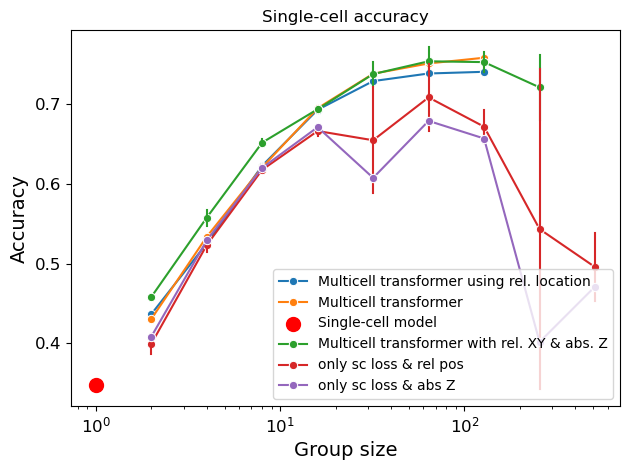

In [19]:



tags = [["group_size_rel_pos"]]
filter_ = runs_df['wandb.tags'].isin(tags) #& (runs_df['train/epoch'] > 40)
sns.lineplot(runs_df[filter_], x='data.group_size', y='eval/cell_accuracy', marker='o', errorbar="sd", err_style="bars")

tags = [["group_size_ss_loss"]]
filter_ = runs_df['wandb.tags'].isin(tags) & (runs_df['train/epoch'] > 40)
sns.lineplot(runs_df[filter_], x='data.group_size', y='eval/cell_accuracy', marker='o', errorbar="sd", err_style="bars")


tags = [["group_size"]]
filter_ = runs_df['wandb.tags'].isin(tags) & (runs_df['data.group_size'] == 1)  & (runs_df['train/epoch'] > 40)
# get average accuracy
single_cell_accuracy = runs_df[filter_]['eval/accuracy'].mean()
# plot as single point at y=single_cell_accuracy, x=1
plt.scatter(1, single_cell_accuracy, color='red', s=100)

tags = [["group_size_rel_pos_absZ"]]
filter_ = runs_df['wandb.tags'].isin(tags) & (runs_df['train/epoch'] > 40)
sns.lineplot(runs_df[filter_], x='data.group_size', y='eval/cell_accuracy', marker='o', errorbar="sd", err_style="bars")


tags = [f"only_ss_loss_{b}" for b in [2, 4, 8, 16, 32, 64, 128, 256, 512]]
filter_ = runs_df['wandb.tags'].apply(lambda x: any(tag in x for tag in tags)) & (runs_df['train/epoch'] > 40)
sns.lineplot(runs_df[filter_], x='data.group_size', y='eval/cell_accuracy', marker='o', errorbar="sd", err_style="bars")


tags = [f"only_ss_loss_absZ_{b}" for b in [2, 4, 8, 16, 32, 64, 128, 256, 512]]
filter_ = runs_df['wandb.tags'].apply(lambda x: any(tag in x for tag in tags)) & (runs_df['train/epoch'] > 40)
sns.lineplot(runs_df[filter_], x='data.group_size', y='eval/cell_accuracy', marker='o', errorbar="sd", err_style="bars")



plt.legend(['Multicell transformer using rel. location',  'Multicell transformer', 'Single-cell model',  'Multicell transformer with rel. XY & abs. Z', 
            "only sc loss & rel pos", "only sc loss & abs Z"])
plt.xscale('log')
plt.xlabel("Group size")
plt.ylabel("Accuracy")
plt.title("Single-cell accuracy")
plt.tight_layout()
plt.savefig("sc_predictions_with_rel_pos.png", dpi=300)


In [17]:
runs_df['wandb.tags'].isin(tags).sum()

0

<Axes: xlabel='data.group_size', ylabel='eval/cell_accuracy'>

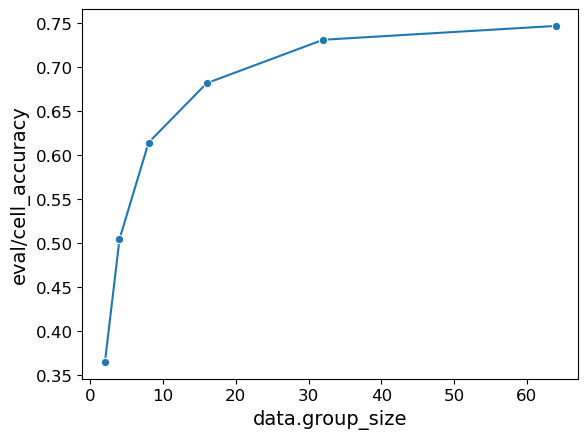

In [6]:

tags = [["group_size_class_weights"]]
filter_ = runs_df['wandb.tags'].isin(tags)
sns.lineplot(runs_df[filter_], x='data.group_size', y='eval/cell_accuracy', marker='o', errorbar="sd", err_style="bars")

#### Benchmarks

In [2]:
runs = api.runs("zadorlab/benchmarks-sweep")

summary_list, config_list, name_list = [], [], []
for run in runs: 
    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    run_info = run.summary._json_dict.copy()

    run_info['state'] = run.state  # 'finished', 'running', 'crashed', etc.
    summary_list.append(run_info)


    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append(
        {k: v for k,v in run.config.items()
          if not k.startswith('_')})

    # .name is the human-readable name of the run.
    name_list.append(run.name)

summary_df = pd.json_normalize(summary_list)

# Flatten the 'config' column
config_df = pd.json_normalize(config_list)

# Concatenate the flattened DataFrames along with the 'name' column
benchmark_runs_df = pd.concat([summary_df, config_df], axis=1)
benchmark_runs_df.head(15)
print(len(benchmark_runs_df))

320


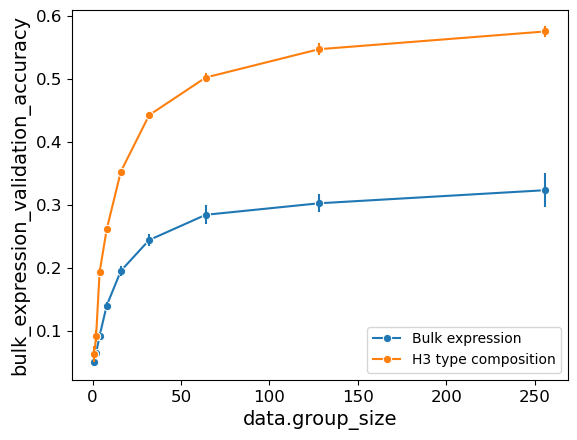

In [3]:

tags = [["benchmarks_h3fix"]] # or rf_search
filter_ = benchmark_runs_df['wandb.tags'].isin(tags)
sns.lineplot(benchmark_runs_df[filter_], x='data.group_size', y='bulk_expression_validation_accuracy', marker='o', errorbar="sd", err_style="bars")

sns.lineplot(benchmark_runs_df[filter_], x='data.group_size', y='h3type_test_accuracy', marker='o', errorbar="sd", err_style="bars")


plt.legend(['Bulk expression', 'H3 type composition', 
        ])

Now in the case without class balancing (`benchmarks_unbalanced`), also comparing logistic regression as well as the debug case of running the model on the direct adatas (`benchmarks_adata`).

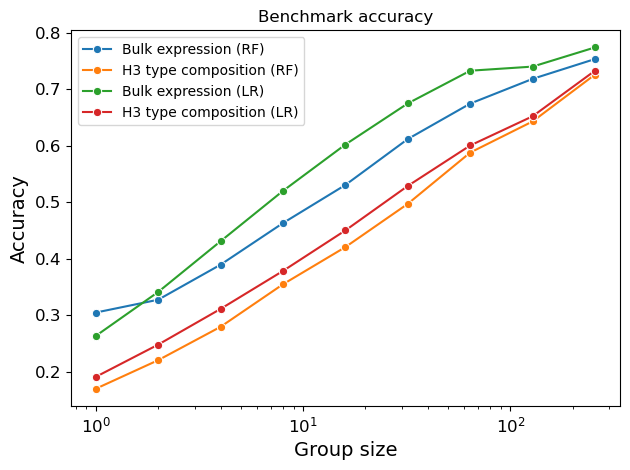

In [4]:

tags = [["benchmarks_bulk_fixed"]] # or rf_search
filter_ = benchmark_runs_df['wandb.tags'].isin(tags)
sns.lineplot(benchmark_runs_df[filter_], x='data.group_size', y='random_forest_bulk_expression_validation_accuracy', marker='o', errorbar="sd", err_style="bars")
sns.lineplot(benchmark_runs_df[filter_], x='data.group_size', y='random_forest_h3type_validation_accuracy', marker='o', errorbar="sd", err_style="bars")

sns.lineplot(benchmark_runs_df[filter_], x='data.group_size', y='logistic_regression_bulk_expression_validation_accuracy', marker='o', errorbar="sd", err_style="bars")
sns.lineplot(benchmark_runs_df[filter_], x='data.group_size', y='logistic_regression_h3type_validation_accuracy', marker='o', errorbar="sd", err_style="bars")


# tags = [["benchmarks_bulk_fixed"]] # or rf_search
# filter_ = benchmark_runs_df['wandb.tags'].isin(tags)
# sns.lineplot(benchmark_runs_df[filter_], x='data.group_size', y='random_forest_bulk_expression_validation_accuracy', marker='o', errorbar="sd", err_style="bars", c='r')
# sns.lineplot(benchmark_runs_df[filter_], x='data.group_size', y='random_forest_h3type_validation_accuracy', marker='o', errorbar="sd", err_style="bars", c='r')

# sns.lineplot(benchmark_runs_df[filter_], x='data.group_size', y='logistic_regression_bulk_expression_validation_accuracy', marker='o', errorbar="sd", err_style="bars", c='r')
# sns.lineplot(benchmark_runs_df[filter_], x='data.group_size', y='logistic_regression_h3type_validation_accuracy', marker='o', errorbar="sd", err_style="bars", c='r')

# tags = [["benchmarks_adata_resample"]] # or rf_search
# filter_ = benchmark_runs_df['wandb.tags'].isin(tags)
# sns.lineplot(benchmark_runs_df[filter_], x='data.group_size', y='random_forest_bulk_expression_validation_accuracy', marker='o', errorbar="sd", err_style="bars", c='k')
# sns.lineplot(benchmark_runs_df[filter_], x='data.group_size', y='random_forest_h3type_validation_accuracy', marker='o', errorbar="sd", err_style="bars", c='k')

# sns.lineplot(benchmark_runs_df[filter_], x='data.group_size', y='logistic_regression_bulk_expression_validation_accuracy', marker='o', errorbar="sd", err_style="bars", c='k')
# sns.lineplot(benchmark_runs_df[filter_], x='data.group_size', y='logistic_regression_h3type_validation_accuracy', marker='o', errorbar="sd", err_style="bars", c='k')


plt.legend(['Bulk expression (RF)', 'H3 type composition (RF)', 'Bulk expression (LR)', 'H3 type composition (LR)', 
        ])
plt.xscale('log')
plt.xlabel("Group size")
plt.ylabel("Accuracy")
plt.title("Benchmark accuracy")
plt.tight_layout()
plt.savefig("all_benchmark_predictions_with_group_size.png", dpi=300)

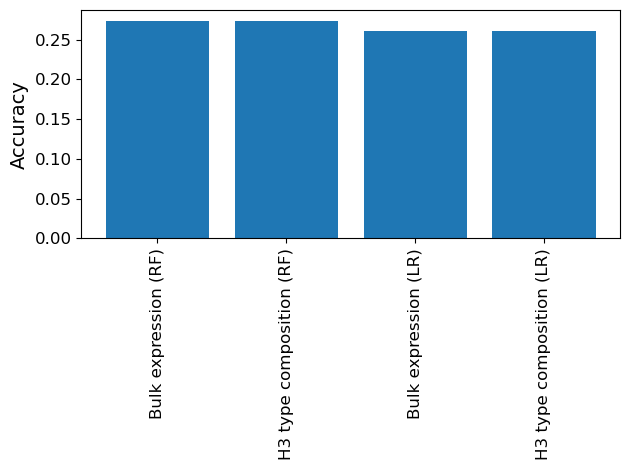

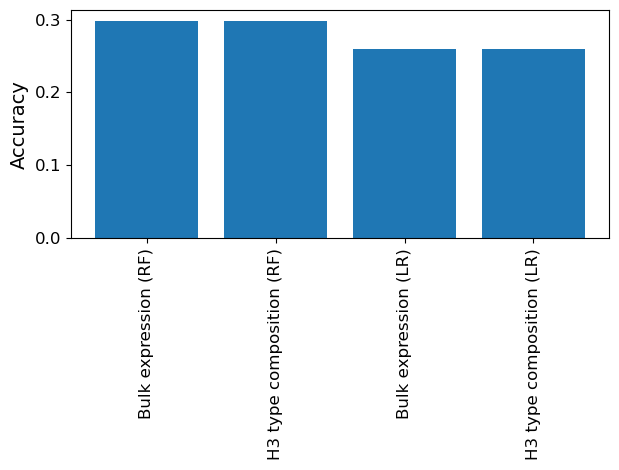

In [ ]:
tags = [["benchmarks_adata_resample"]] # or rf_search
filter_ = benchmark_runs_df['wandb.tags'].isin(tags)
r = benchmark_runs_df[filter_][['random_forest_bulk_expression_test_accuracy','random_forest_h3type_test_accuracy', 
                            'logistic_regression_bulk_expression_test_accuracy', 'logistic_regression_h3type_test_accuracy']].mean()
# plot as a bar plot
plt.bar(range(4), r)
plt.xticks(range(4), ['Bulk expression (RF)', 'H3 type composition (RF)', 'Bulk expression (LR)', 'H3 type composition (LR)'], rotation=90);
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

/tmp/ipykernel_3591586/51070479.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'{int(label * 100)}' for label in current_labels])


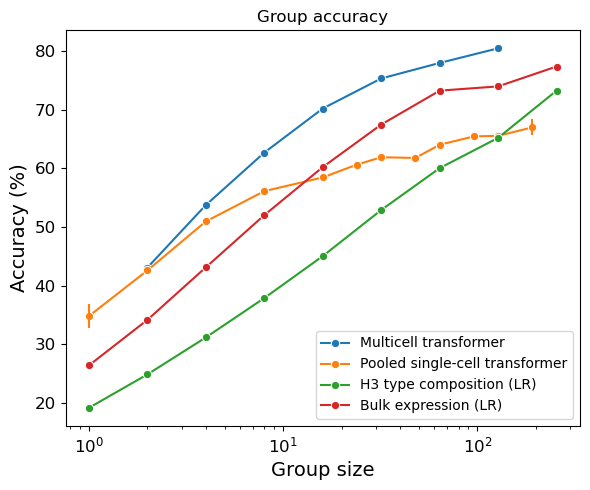

In [3]:
accuracy_col = 'eval/accuracy'

# tags = [["group_size_rel_pos"]]
# filter_ = runs_df['wandb.tags'].isin(tags) #& (runs_df['train/epoch'] > 40)

plt.figure(figsize=(6, 5))

tags = [["group_size_ss_loss"]]
filter_ = runs_df['wandb.tags'].isin(tags)  & (runs_df['train/epoch'] > 40)
sns.lineplot(runs_df[filter_], x='data.group_size', y=accuracy_col, marker='o', errorbar="sd", err_style="bars")

tags = [["group_size"]]
filter_ = runs_df['wandb.tags'].isin(tags) & (runs_df['model.detach_single_cell_logits'] == True) & (runs_df['single_cell_augmentation'] == True) 
sns.lineplot(runs_df[filter_], x='data.group_size', y=accuracy_col, marker='o', errorbar="sd", err_style="bars")


tags = [["benchmarks_bulk_fixed"]] # or rf_search
filter_ = benchmark_runs_df['wandb.tags'].isin(tags)

sns.lineplot(benchmark_runs_df[filter_], x='data.group_size', y='logistic_regression_h3type_validation_accuracy', marker='o', errorbar="sd", err_style="bars")

sns.lineplot(benchmark_runs_df[filter_], x='data.group_size', y='logistic_regression_bulk_expression_validation_accuracy', marker='o', errorbar="sd", err_style="bars")


plt.legend(['Multicell transformer', 'Pooled single-cell transformer', 'H3 type composition (LR)', 'Bulk expression (LR)',])

# Relabel the y-axis ticks to multiply the labels by 100
current_labels = plt.gca().get_yticks()
plt.gca().set_yticklabels([f'{int(label * 100)}' for label in current_labels])

plt.xscale('log')
plt.xlabel("Group size")
plt.ylabel("Accuracy (%)")
plt.title("Group accuracy")
plt.tight_layout()
# plt.savefig("group_predictions_with_benchmarks_log.png", dpi=300)


/tmp/ipykernel_26591/4096821666.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'{int(label * 100)}' for label in current_labels])


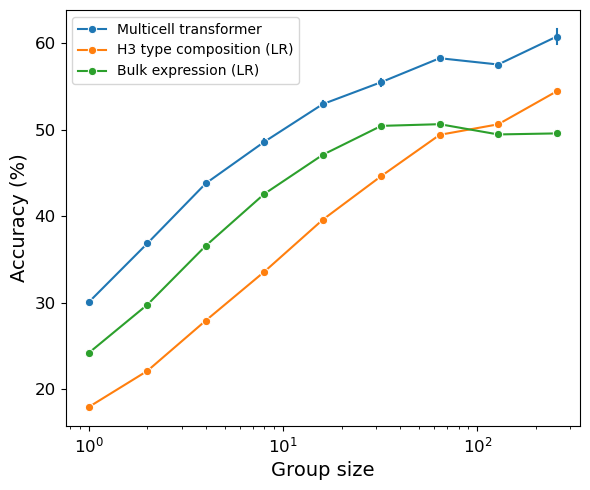

In [46]:
val_or_test = 'test'
accuracy_col = 'eval/accuracy' if val_or_test == 'val' else 'test/accuracy'

plt.figure(figsize=(6, 5))

tags = [["group_size_ss_loss"], ["fold3_balancedBatchSize"], ["fold3_balancedBatchSize_rmstest"]]
filter_ = runs_df['wandb.tags'].isin(tags)  & ~(runs_df['test/loss'].isna()) & (runs_df['train/epoch'] > 5) & (runs_df['data.group_size'] < 512)
# sns.lineplot(runs_df[filter_], x='data.group_size', y=accuracy_col, marker='o', errorbar="sd", err_style="bars")

tags = [["group_size"]]
filter_ = (runs_df['wandb.tags'].isin(tags) & (runs_df['model.detach_single_cell_logits'] == True) & (runs_df['single_cell_augmentation'] == True) &\
    (runs_df['data.group_size'] == 1)) | filter_

sns.lineplot(runs_df[filter_], x='data.group_size', y=accuracy_col, marker='o', errorbar="sd", err_style="bars")


tags = [["benchmarks_bulk_fixed"]] # or rf_search
filter_ = benchmark_runs_df['wandb.tags'].isin(tags)

sns.lineplot(benchmark_runs_df[filter_], x='data.group_size', 
             y=f"logistic_regression_h3type_{'validation' if val_or_test == 'val' else 'test'}_accuracy",
             marker='o', errorbar="sd", err_style="bars")

sns.lineplot(benchmark_runs_df[filter_], x='data.group_size',
             y=f"logistic_regression_bulk_expression_{'validation' if val_or_test == 'val' else 'test'}_accuracy", 
             marker='o', errorbar="sd", err_style="bars")


plt.legend(['Multicell transformer', 'H3 type composition (LR)', 'Bulk expression (LR)',])

# Relabel the y-axis ticks to multiply the labels by 100
current_labels = plt.gca().get_yticks()
plt.gca().set_yticklabels([f'{int(label * 100)}' for label in current_labels])

plt.xscale('log')
plt.xlabel("Group size")
plt.ylabel("Accuracy (%)")
# plt.title("Group accuracy")
plt.tight_layout()
plt.savefig(f"{val_or_test}_clean_group_predictions_with_benchmarks_log.png", dpi=300)


To plot:

- fold3_balancedBatchSize, and the other folds, for validation accuracy
    - fold3_balancedBatchSize_hex for test accuracy
- fold3_balancedBatchSize_test_enucleated for validation accuracy. Also plot test brain predictions
- fold3_balancedBatchSize_rmstest validation accuracy to see if that helps

/tmp/ipykernel_3601188/1376539465.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(label * 100)}' for label in current_labels])


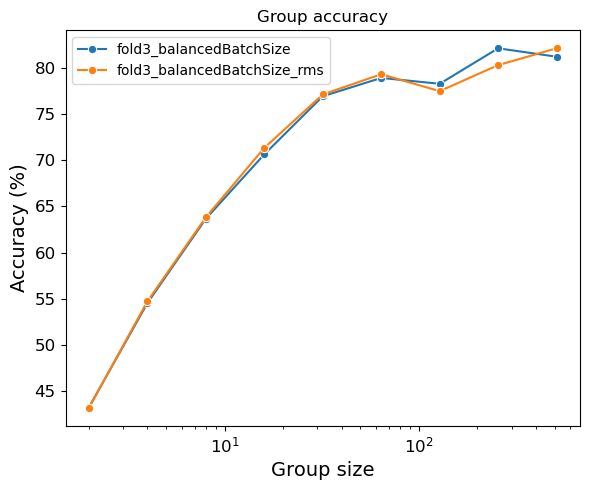

In [3]:
def plot_accuracy_vs_parameters(runs_df, x_col = 'data.group_size', y_col = 'eval/accuracy', 
                                tags = [["fold3_balancedBatchSize"], ["fold3_balancedBatchSize_rmstest"]],
                                legend = ['fold3_balancedBatchSize', 'fold3_balancedBatchSize_rms', ],
                                ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 5))
    
    for tag in tags:
        filter_ = runs_df['wandb.tags'].isin([tag]) & ~(runs_df['test/loss'].isna())
        sns.lineplot(runs_df[filter_], x=x_col, y=y_col, marker='o', errorbar="sd", err_style="bars", ax=ax)

    ax.legend(legend)
    ax.set_title(f'{y_col} vs {x_col}')
    current_labels = ax.get_yticks()
    ax.set_yticklabels([f'{int(label * 100)}' for label in current_labels])

    ax.set_xscale('log')
    ax.set_xlabel("Group size")
    ax.set_ylabel("Accuracy (%)")
    ax.set_title("Group accuracy")
    plt.tight_layout()

f, ax = plt.subplots(figsize=(6, 5))
plot_accuracy_vs_parameters(runs_df, tags = [["fold3_balancedBatchSize"], ["fold3_balancedBatchSize_rmstest"]],
                                legend = ['fold3_balancedBatchSize', 'fold3_balancedBatchSize_rms', ], ax=ax)


/tmp/ipykernel_3601188/2738633829.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(label * 100)}' for label in current_labels])
/tmp/ipykernel_3601188/2738633829.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(label * 100)}' for label in current_labels])


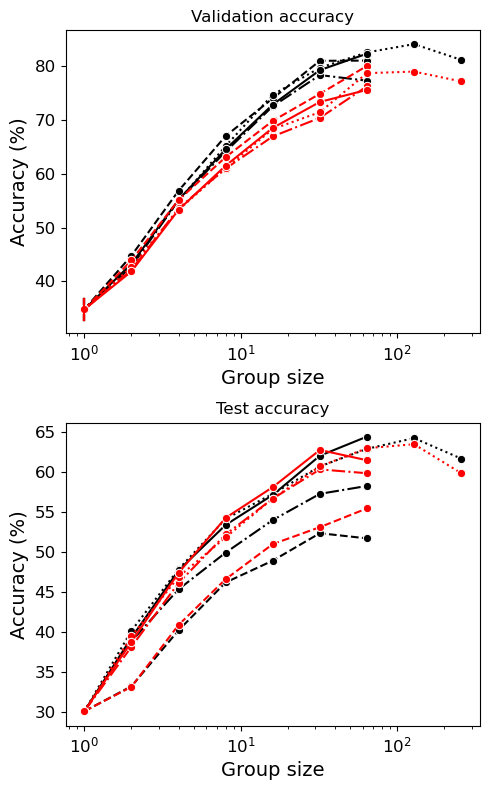

In [17]:
fig, axs = plt.subplots(2,1, figsize=(5, 8))

# a list of 4 linestles
styles = ['--', '-.', ':', '-']

for condition in ['all_exhausted', 'animal_name']:
    for fold in range(4):
        if fold == 4:
            f = 'test_enucleated'
        else:
            f = fold
        ax = axs[0]
        val_or_test = 'val'
        accuracy_col = 'eval/accuracy' if val_or_test == 'val' else 'test/accuracy'

        tags = [[f"fold{f}_{condition}"]]
        filter_ = runs_df['wandb.tags'].isin(tags)  & ~(runs_df['test/loss'].isna()) & (runs_df['train/epoch'] > 5) & (runs_df['data.group_size'] < 512)
        tags = [["group_size"]]
        filter_ = (runs_df['wandb.tags'].isin(tags) & (runs_df['model.detach_single_cell_logits'] == True) & (runs_df['single_cell_augmentation'] == True) &\
            (runs_df['data.group_size'] == 1)) | filter_

        sns.lineplot(runs_df[filter_], x='data.group_size', y=accuracy_col, marker='o', errorbar="sd", err_style="bars",
                    ax=ax, c = 'k' if condition=='all_exhausted' else 'r', linestyle = styles[fold])
        ax.set_title("Validation accuracy")

        ax = axs[1]
        val_or_test = 'test'
        accuracy_col = 'eval/accuracy' if val_or_test == 'val' else 'test/accuracy'

        tags = [[f"fold{f}_{condition}"]]
        filter_ = runs_df['wandb.tags'].isin(tags)  & ~(runs_df['test/loss'].isna()) & (runs_df['train/epoch'] > 5) & (runs_df['data.group_size'] < 512)
        tags = [["group_size"]]
        filter_ = (runs_df['wandb.tags'].isin(tags) & (runs_df['model.detach_single_cell_logits'] == True) & (runs_df['single_cell_augmentation'] == True) &\
            (runs_df['data.group_size'] == 1)) | filter_

        sns.lineplot(runs_df[filter_], x='data.group_size', y=accuracy_col, marker='o', errorbar="sd", err_style="bars",
                    ax=ax, c = 'k' if condition=='all_exhausted' else 'r', linestyle = styles[fold])
        ax.set_title("Test accuracy")

for ax in axs:
    current_labels = ax.get_yticks()
    ax.set_yticklabels([f'{int(label * 100)}' for label in current_labels])

    ax.set_xscale('log')
    ax.set_xlabel("Group size")
    ax.set_ylabel("Accuracy (%)")
    # ax.set_title("Group accuracy")
plt.tight_layout()

/tmp/ipykernel_3601188/1376539465.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(label * 100)}' for label in current_labels])
/tmp/ipykernel_3601188/1376539465.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(label * 100)}' for label in current_labels])
/tmp/ipykernel_3601188/1376539465.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(label * 100)}' for label in current_labels])
/tmp/ipykernel_3601188/1376539465.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(label * 100)}' for label in current_labels])
/tmp/ipykernel_3601188/13765

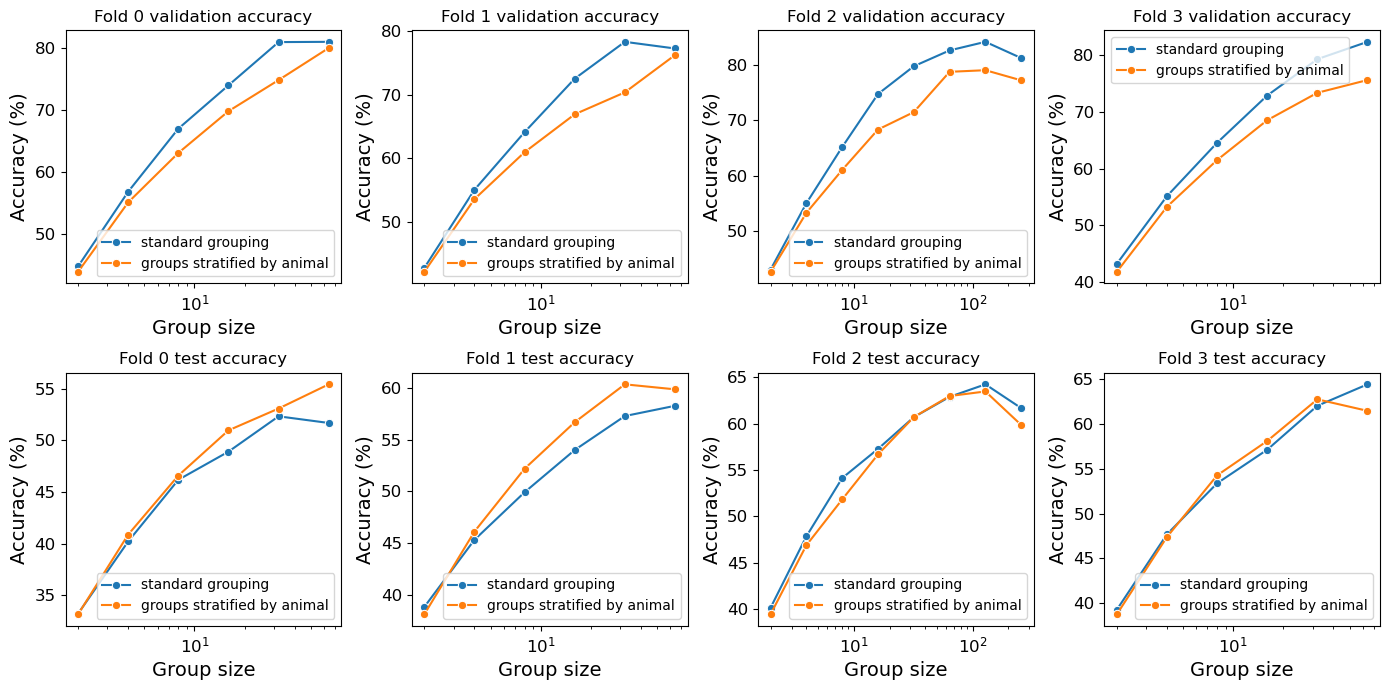

In [21]:
fig, axs = plt.subplots(2,4, figsize=(14, 7))

for fold in range(4):
    if fold == 4:
        f = 'test_enucleated'
    else:
        f = fold
    ax = axs[0, fold,]
    plot_accuracy_vs_parameters(runs_df, tags = [ [f"fold{f}_all_exhausted"],[f"fold{f}_animal_name"]],
                                    legend = ['standard grouping', 'groups stratified by animal',],
                                    ax=ax)
    ax.set_title(f'Fold {f} validation accuracy')
    ax = axs[1, fold,]
    plot_accuracy_vs_parameters(runs_df, tags = [ [f"fold{f}_all_exhausted"],[f"fold{f}_animal_name"]],
                                y_col = 'test/accuracy', 
                                    legend = ['standard grouping', 'groups stratified by animal',],
                                ax=ax)
    ax.set_title(f'Fold {f} test accuracy')
    # ax = axs[2,fold]
    # plot_accuracy_vs_parameters(runs_df, tags = [ [f"fold{f}_all_exhausted_hex"],[f"fold{f}_animal_name_hex"]],
    #                             y_col = 'test/accuracy', 
    #                                 legend = ['standard grouping', 'groups stratified by animal',],
    #                             ax=ax)
    # ax.set_title(f'Fold {f} test accuracy (high-density train regions)')
plt.tight_layout()
# plt.savefig("group_by_animal_helps_test_hurts_val.png")
plt.show()

/tmp/ipykernel_3591586/1376539465.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(label * 100)}' for label in current_labels])
/tmp/ipykernel_3591586/1376539465.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(label * 100)}' for label in current_labels])
/tmp/ipykernel_3591586/1376539465.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(label * 100)}' for label in current_labels])
/tmp/ipykernel_3591586/1376539465.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(label * 100)}' for label in current_labels])
/tmp/ipykernel_3591586/13765

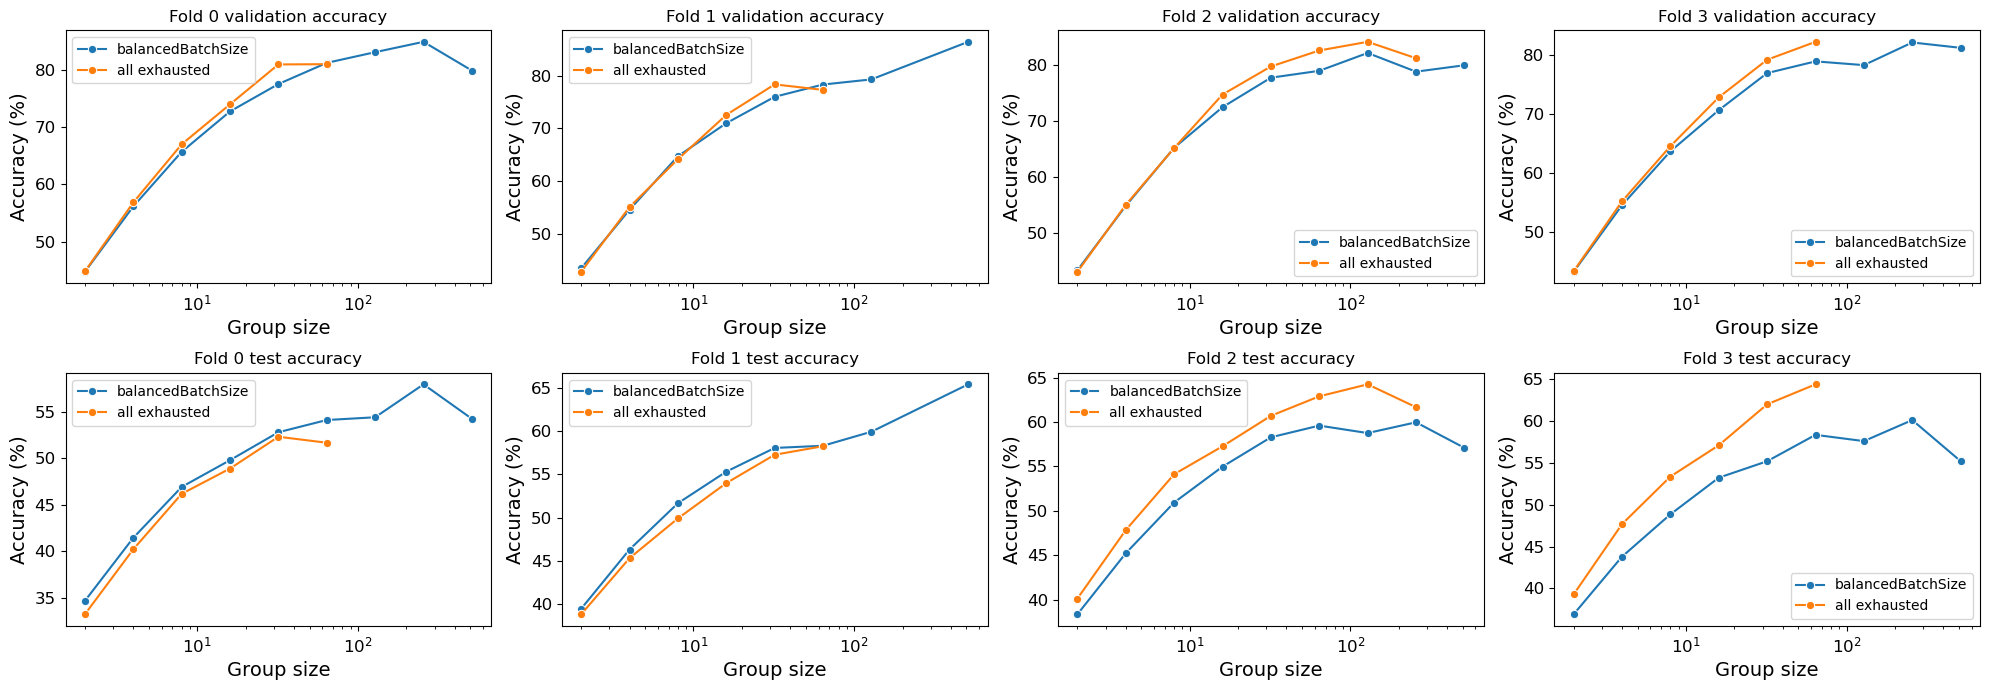

In [ ]:
fig, axs = plt.subplots(2,4, figsize=(20, 7))

for fold in range(4):
    if fold == 4:
        f = 'test_enucleated'
    else:
        f = fold
    ax = axs[0, fold,]
    plot_accuracy_vs_parameters(runs_df, tags = [[f"fold{f}_balancedBatchSize"], [f"fold{f}_all_exhausted"],],
                                    legend = ['balancedBatchSize', 'all exhausted',],
                                    ax=ax)
    ax.set_title(f'Fold {f} validation accuracy')
    ax = axs[1, fold,]
    plot_accuracy_vs_parameters(runs_df, tags = [[f"fold{f}_balancedBatchSize"], [f"fold{f}_all_exhausted"]],
                                y_col = 'test/accuracy', 
                                legend = ['balancedBatchSize', 'all exhausted', ], ax=ax)
    ax.set_title(f'Fold {f} test accuracy')
plt.tight_layout()
plt.savefig("all_exhausted_helps.png", dpi=300)
plt.show()

/tmp/ipykernel_3601188/1407008965.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'{int(label * 100)}' for label in current_labels])


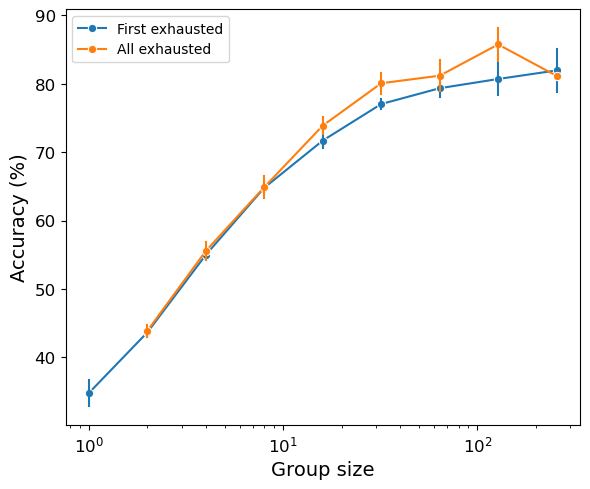

In [12]:
val_or_test = 'val'
accuracy_col = 'eval/accuracy' if val_or_test == 'val' else 'test/accuracy'

plt.figure(figsize=(6, 5))

tags = [[f"fold{f}_balancedBatchSize"] for f in [0, 1, 2, 3, 'test_enucleated']]
filter_ = runs_df['wandb.tags'].isin(tags)  & ~(runs_df['test/loss'].isna()) & (runs_df['train/epoch'] > 5) & (runs_df['data.group_size'] < 512)
# sns.lineplot(runs_df[filter_], x='data.group_size', y=accuracy_col, marker='o', errorbar="sd", err_style="bars")

tags = [["group_size"]]
filter_ = (runs_df['wandb.tags'].isin(tags) & (runs_df['model.detach_single_cell_logits'] == True) & (runs_df['single_cell_augmentation'] == True) &\
    (runs_df['data.group_size'] == 1)) | filter_

sns.lineplot(runs_df[filter_], x='data.group_size', y=accuracy_col, marker='o', errorbar="sd", err_style="bars")


tags = [[f"fold{f}_all_exhausted"] for f in [0, 1, 2, 3, 'test_enucleated']] # or rf_search
filter_ = runs_df['wandb.tags'].isin(tags)

sns.lineplot(runs_df[filter_], x='data.group_size', y=accuracy_col, marker='o', errorbar="sd", err_style="bars")

plt.legend(["First exhausted", "All exhausted"])

# Relabel the y-axis ticks to multiply the labels by 100
current_labels = plt.gca().get_yticks()
plt.gca().set_yticklabels([f'{int(label * 100)}' for label in current_labels])

plt.xscale('log')
plt.xlabel("Group size")
plt.ylabel("Accuracy (%)")
# plt.title("Group accuracy")
plt.tight_layout()
# plt.savefig(f"{val_or_test}_clean_group_predictions_with_benchmarks_log.png", dpi=300)


/tmp/ipykernel_3601188/1407008965.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'{int(label * 100)}' for label in current_labels])


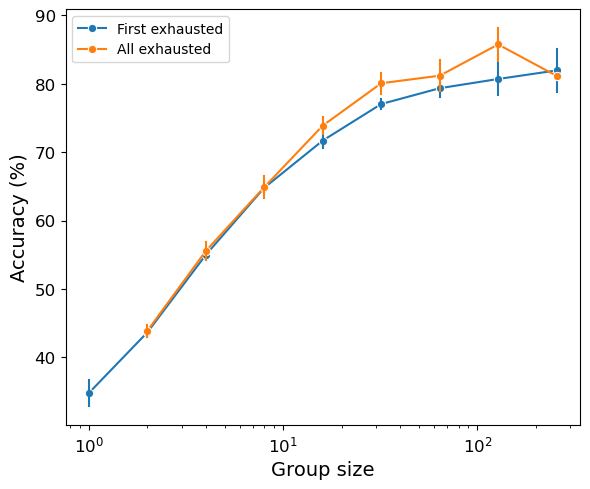

In [ ]:
val_or_test = 'val'
accuracy_col = 'eval/accuracy' if val_or_test == 'val' else 'test/accuracy'

plt.figure(figsize=(6, 5))

tags = [[f"fold{f}_balancedBatchSize"] for f in [0, 1, 2, 3, 'test_enucleated']]
filter_ = runs_df['wandb.tags'].isin(tags)  & ~(runs_df['test/loss'].isna()) & (runs_df['train/epoch'] > 5) & (runs_df['data.group_size'] < 512)
# sns.lineplot(runs_df[filter_], x='data.group_size', y=accuracy_col, marker='o', errorbar="sd", err_style="bars")

tags = [["group_size"]]
filter_ = (runs_df['wandb.tags'].isin(tags) & (runs_df['model.detach_single_cell_logits'] == True) & (runs_df['single_cell_augmentation'] == True) &\
    (runs_df['data.group_size'] == 1)) | filter_

sns.lineplot(runs_df[filter_], x='data.group_size', y=accuracy_col, marker='o', errorbar="sd", err_style="bars")


tags = [[f"fold{f}_all_exhausted"] for f in [0, 1, 2, 3, 'test_enucleated']] # or rf_search
filter_ = runs_df['wandb.tags'].isin(tags)

sns.lineplot(runs_df[filter_], x='data.group_size', y=accuracy_col, marker='o', errorbar="sd", err_style="bars")

plt.legend(["First exhausted", "All exhausted"])

# Relabel the y-axis ticks to multiply the labels by 100
current_labels = plt.gca().get_yticks()
plt.gca().set_yticklabels([f'{int(label * 100)}' for label in current_labels])

plt.xscale('log')
plt.xlabel("Group size")
plt.ylabel("Accuracy (%)")
# plt.title("Group accuracy")
plt.tight_layout()
# plt.savefig(f"{val_or_test}_clean_group_predictions_with_benchmarks_log.png", dpi=300)


/tmp/ipykernel_19642/1201853984.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'{int(label * 100)}' for label in current_labels])


Text(0.5, 1.0, 'Validation accuracy vs group size')

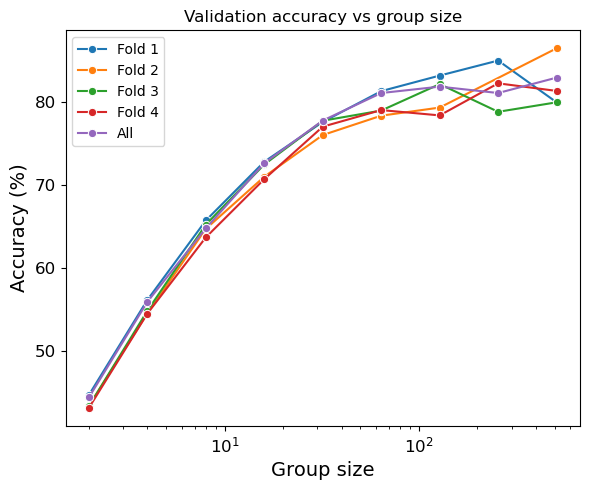

In [40]:

plot_accuracy_vs_parameters(runs_df, tags = [["fold0_balancedBatchSize"], ["fold1_balancedBatchSize"],
                                              ["fold2_balancedBatchSize"], ["fold3_balancedBatchSize"],
                                              ["test_enucleated_balancedBatchSize"]],
                                legend = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'All'],)
plt.title("Validation accuracy vs group size")

/tmp/ipykernel_19642/1201853984.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'{int(label * 100)}' for label in current_labels])


Text(0.5, 1.0, 'Test accuracy vs group size')

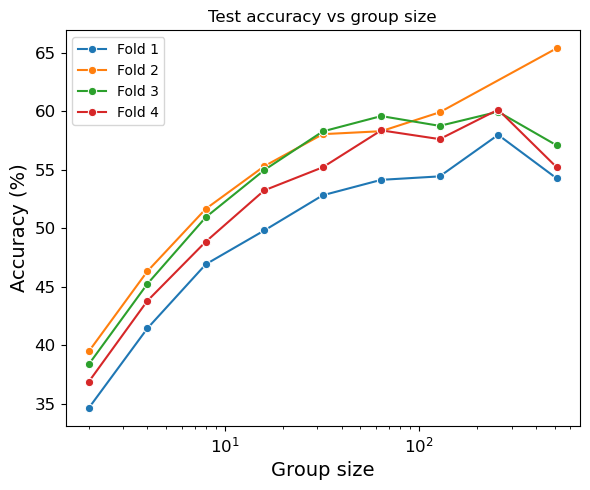

In [39]:

plot_accuracy_vs_parameters(runs_df, y_col="test/accuracy", 
                            tags = [["fold0_balancedBatchSize"], ["fold1_balancedBatchSize"],
                                              ["fold2_balancedBatchSize"], ["fold3_balancedBatchSize"]],
                                legend = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4'],)
plt.title("Test accuracy vs group size")

/tmp/ipykernel_26591/1201853984.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'{int(label * 100)}' for label in current_labels])


Text(0.5, 1.0, 'Test brain accuracy (high-density train regions)')

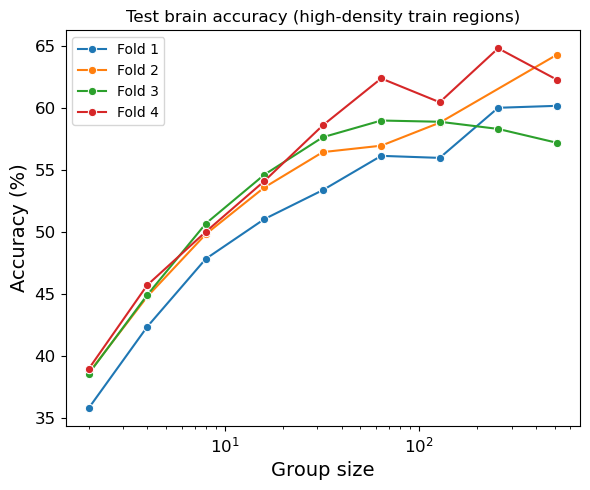

In [50]:

plot_accuracy_vs_parameters(runs_df, y_col="test/accuracy", 
                            tags = [["fold0_balancedBatchSize_hex"], ["fold1_balancedBatchSize_hex"],
                                              ["fold2_balancedBatchSize_hex"], ["fold3_balancedBatchSize_hex"]],
                                legend = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4'],)
plt.title("Test brain accuracy (high-density train regions)")

/tmp/ipykernel_26591/855346552.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered1['condition'] = 'High-density regions'
/tmp/ipykernel_26591/855346552.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered2['condition'] = 'All regions'
/tmp/ipykernel_26591/855346552.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

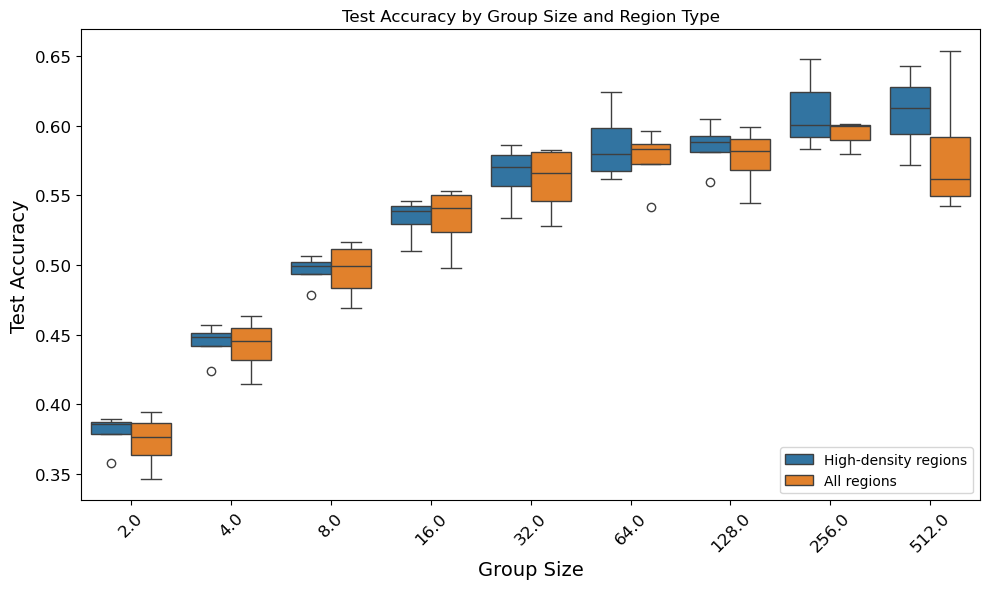

In [66]:
# condition 1 - hex data
tags1 = [["fold0_balancedBatchSize_hex"], ["fold1_balancedBatchSize_hex"],
    ["fold2_balancedBatchSize_hex"], ["fold3_balancedBatchSize_hex"]]

filter1 = runs_df['wandb.tags'].isin(tags1) & ~(runs_df['test/loss'].isna())
df_filtered1 = runs_df[filter1]

# condition 2 - regular data
tags2 = [["fold0_balancedBatchSize"], ["fold1_balancedBatchSize"],
    ["fold2_balancedBatchSize"], ["fold3_balancedBatchSize"]]

filter2 = runs_df['wandb.tags'].isin(tags2) & ~(runs_df['test/loss'].isna())
df_filtered2 = runs_df[filter2]

# Combine the data with a condition label
df_filtered1['condition'] = 'High-density regions'
df_filtered2['condition'] = 'All regions'

combined_df = pd.concat([df_filtered1, df_filtered2])

# Calculate mean accuracy for each group size
grouped_by_group_size = df_filtered1.groupby('data.group_size')
mean_accuracy = grouped_by_group_size['test/accuracy'].mean()

# Calculate normalized accuracies by subtracting the mean for each group size
combined_df['normalized_accuracy'] = combined_df.apply(
    lambda row: row['test/accuracy'] - mean_accuracy[row['data.group_size']], 
    axis=1
)

# Create the paired box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_df, x='data.group_size', y='test/accuracy', hue='condition')

# Customize the plot
plt.xlabel('Group Size')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy by Group Size and Region Type')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Move legend to a better position
plt.legend( loc='lower right')

plt.tight_layout()